In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
Npts = 100
T = 1
Nt = 100000
x = np.linspace(0, 1, Npts+1)    # mesh points in space
dx = x[1] - x[0]
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = dt/dx**2
u   = np.zeros(Npts+1)           # unknown u at new time level
u_n = np.zeros(Npts+1)           # u at the previous time level
eta = np.zeros(Npts+1)           # u at the previous time level
num_plots=9

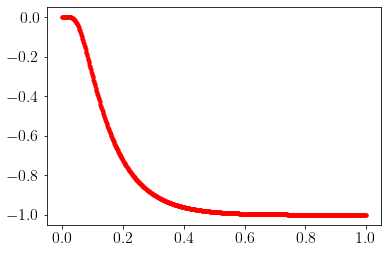

In [93]:
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

# Set initial condition u(x,0) = I(x)
for i in range(0, Npts+1):
    u_n[i] = 0

for n in range(0, 100000):
    # Compute u at inner mesh points
    for i in range(1, Npts):
        u[i] = u_n[i] + F*(u_n[i-1] - 2*u_n[i] + u_n[i+1])

    # Insert boundary conditions
    u[0] = 1;  u[Npts] = 0

    # Update u_n before next step
    u_n[:]= u
    if n>0:
        eta[:]=x/np.sqrt(n*dt)
    bottom_flux = (u[1]-u[0])/dx
    top_flux = (u[Npts]-u[Npts-1])/dx
    #if n in (10,20,50,100,200,500,1000,2000,5000):
    #    plt.xlim([0,10])
    #    plt.plot(eta, u)
    #plt.plot(n*dt,bottom_flux,'k.')
    if n%100==0:
        plt.plot(n*dt,top_flux,'r.')

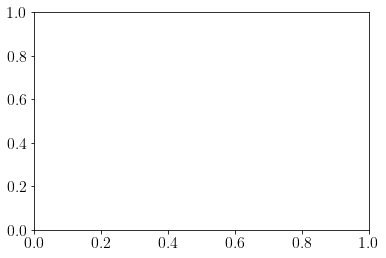

In [63]:
plt.xlim([0,1])
plt.show()

[Text(0.5, 1.0, '$u$')]

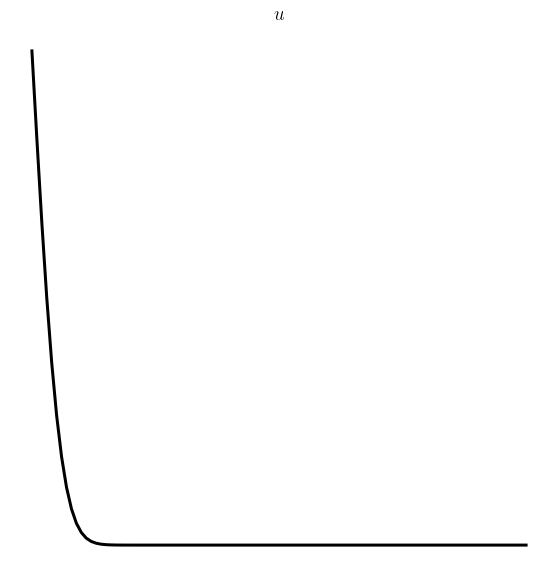

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
# ax.plot(x,y,'b.')  # plot grid points
ax.set_aspect('equal')
ax.plot(x, u, 'k', linewidth=3)
ax.axis('off')
ax.set(title=r'$u$')